In [1]:
import torch
import math
import os
import numpy as np
from utility import *
import matplotlib.pyplot as plt
def optimize(dataset, model, config):
    loss_func = get_loss(config)
    optimizer = torch.optim.SGD(model.parameters(), lr=config["lr"], weight_decay=1e-5, momentum=0.9)
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[500,800], gamma=0.5)

    def update():
        model.train()
        measure = {'loss':0,'accuracy':0}
        index = torch.randperm(dataset.train.n)
        for idx in torch.split(index, config["batch_size"]):
            optimizer.zero_grad()
            x = dataset.train.x[idx]
            y = dataset.train.y[idx]
            o = model(x)
            loss = loss_func(o,y)
            loss.backward()            
        optimizer.step()
        scheduler.step()

    def evaluate(data):
        model.eval()
        with torch.no_grad():
            output    = model(data.x)            # logit
            loss    = loss_func(output, data.y)
            loss     = loss.item()
            output    = output.max(dim=1)[1]            # logit -> index
            correct    = (output==data.y) 
            accuracy   = correct.float().mean().item()    # bool -> int(0,1) -> float
            return loss, accuracy

    epoch = 0
    trajectory = {"train_loss":[], "test_loss":[]}
    while True:
        epoch += 1
        #
        update()
        #
        status = {}
        train_loss, train_acc = evaluate(dataset.train)
        status['train'] = {'loss': train_loss, 'accuracy':  train_acc}
        test_loss, test_acc = evaluate(dataset.test)
        status['test'] = {'loss': test_loss, 'accuracy':  test_acc}
        trajectory["test_loss"].append(test_loss)
        trajectory["train_loss"].append(train_loss)
        report(f'epoch:{epoch}')
        # Dump Log
        if epoch % 100 == 0:
            report(f'epoch:{epoch}')
            for mode in ['train','test']:
                message     = [f'\t{mode:5}']
                message    += [f"loss:{status[mode]['loss']: 18.7f}"]
                message    += [f"accuracy:{status[mode]['accuracy']: 9.7f}"]
                report(*message)
        assert not math.isnan(status['train']['loss']), 'find nan in train-loss'
        assert not math.isnan(status['test']['loss']),  'find nan in test-loss'
        if epoch == config['epoch']: return trajectory



In [2]:
#!/usr/bin/env python
# coding: utf-8
# import optuna
# study = optuna.create_study()
# study.optimize(objective, n_trials=100)
# config['batch_size'] = trial.suggest_float("lr", 1, 2**10)

config = {}
# general
config['model'] = 'MLP'
config["core"]  = 0
config['data']  = 'CIFAR10'
config['batch_size'] = 2**7
config['sharpness'] = 1
config['lr'] = 1e-2
config['loss'] = "MSE"
config['epoch'] = 50

set_device(config)
dataset = get_dataset(config)
model = get_model(config)
trajectory = optimize(dataset, model, config)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(trajectory["train_loss"], label="Train Loss")
ax.plot(trajectory["test_loss"], label="Test Loss")
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
ax.set_ylim([0, 0.1])
ax.legend(loc="upper left")
fig.show()



2022-01-15 12:52:50.151762 use GPU; core:0
Files already downloaded and verified
Files already downloaded and verified
2022-01-15 12:53:12.473752 epoch:1
2022-01-15 12:53:12.953051 epoch:2
2022-01-15 12:53:13.433898 epoch:3
2022-01-15 12:53:13.912956 epoch:4
2022-01-15 12:53:14.387653 epoch:5
2022-01-15 12:53:14.859720 epoch:6
2022-01-15 12:53:15.333821 epoch:7
2022-01-15 12:53:15.804430 epoch:8
2022-01-15 12:53:16.290824 epoch:9
2022-01-15 12:53:16.771723 epoch:10


KeyboardInterrupt: 

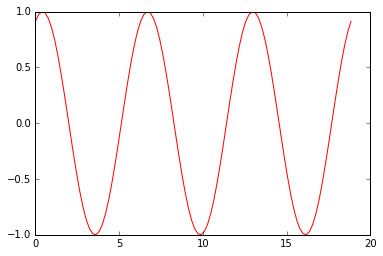

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma


line1.set_ydata(np.sin(x + 20))
fig.canvas.draw()
fig.canvas.flush_events()

In [13]:
np.abs(-1)

1